# Graphics of Prades data and first lab results

### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import re

In [2]:
control=[5,7,9,10]
drought=[2,3,4,6]

### Carbon stocks

In [181]:
#con=pd.read_csv('~\\Model_Prades\\Data\\Prades_data_control.csv')
#dro=pd.read_csv('~\\Model_Prades\\Data\\Prades_data_drought.csv')
con=pd.read_csv('Data/Prades_data_control.csv')
dro=pd.read_csv('Data/Prades_data_drought.csv')

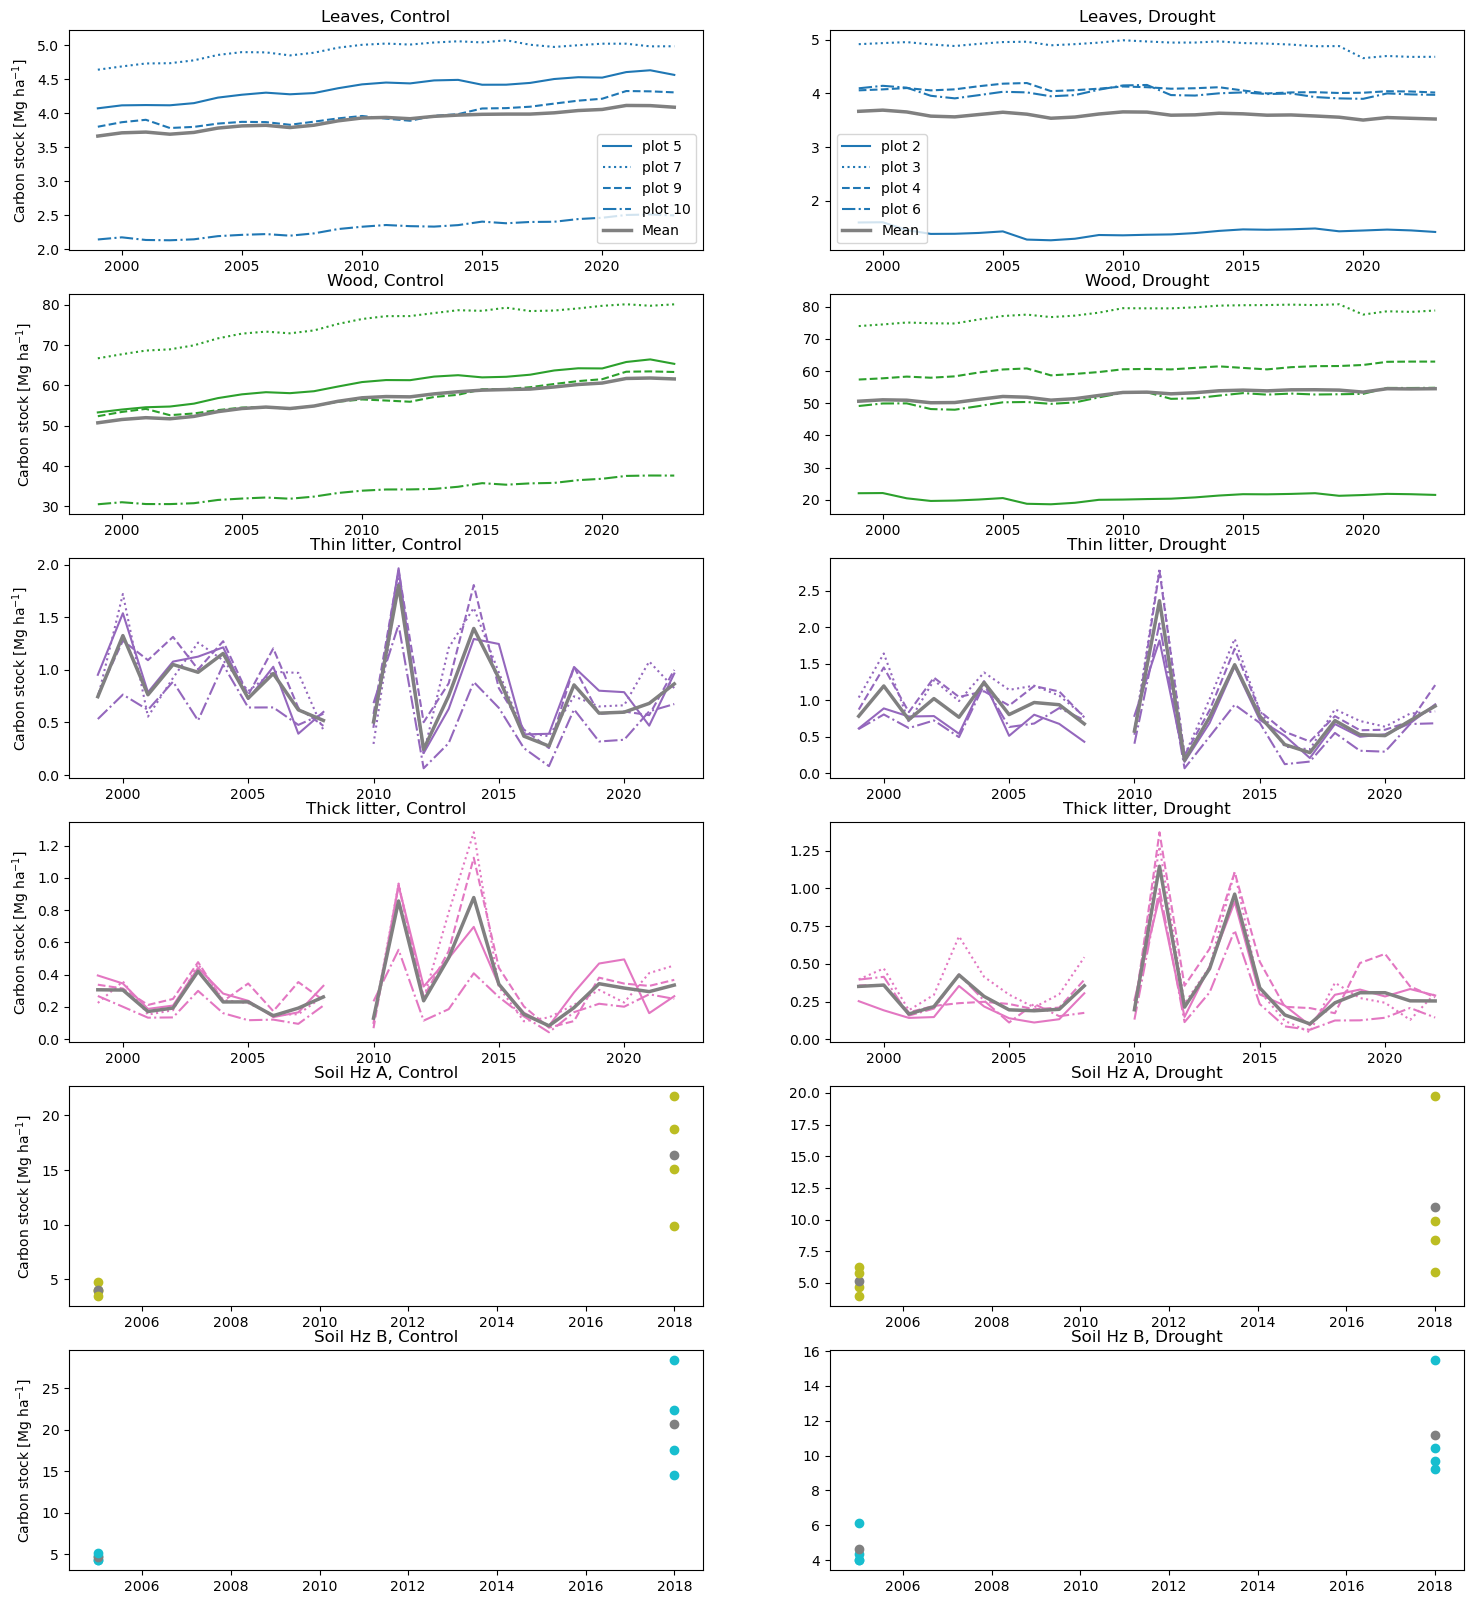

In [182]:
linestyle=['solid','dotted','dashed','dashdot']
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,6))

fig,axs=plt.subplots(6,2,figsize=[18,20])
for j in range(6):
    for i in range(4):
        axs[j,0].plot(con[con.Plot==control[i]].Year,con[con.Plot==control[i]][con.columns[j+2]],color=colors[j],linestyle=linestyle[i],label='plot '+str(control[i]))
        axs[j,1].plot(dro[dro.Plot==drought[i]].Year,dro[dro.Plot==drought[i]][dro.columns[j+2]],color=colors[j],linestyle=linestyle[i],label='plot '+str(drought[i]))
# Means       
        if i==3:
            w=con[['Year',con.columns[j+2]]]
            mean=np.zeros(25)
            for k in range(1999,2024):mean[k-1999]=w[w.Year==k].mean().iloc[1]
            axs[j,0].plot(con[con.Plot==control[0]].Year,mean,color='gray',label='Mean',linewidth=2.5)
            if j>3:axs[j,0].plot(con[con.Plot==control[0]].Year,mean,'o',color='gray')
           
            w=dro[['Year',dro.columns[j+2]]]
            mean=np.zeros(25)
            for k in range(1999,2024):mean[k-1999]=w[w.Year==k].mean().iloc[1]
            axs[j,1].plot(dro[dro.Plot==drought[0]].Year,mean,color='gray',label='Mean',linewidth=2.5)
            if j>3:axs[j,1].plot(dro[dro.Plot==drought[0]].Year,mean,'o',color='gray')
        
        axs[j,0].set_title(str(con.columns[j+2])+', Control'); axs[j,1].set_title(str(dro.columns[j+2])+', Drought')
        axs[j,0].set_ylabel('Carbon stock [Mg ha$^{-1}$]')
        if j>3:
            axs[j,0].plot(con[con.Plot==control[i]].Year,con[con.Plot==control[i]][con.columns[j+2]],'o',color=colors[j],label='plot '+str(control[i]),linestyle=linestyle[i])
            axs[j,1].plot(dro[dro.Plot==drought[i]].Year,dro[dro.Plot==drought[i]][dro.columns[j+2]],'o',color=colors[j],linestyle=linestyle[i],label='plot '+str(drought[i]))
    if j==0:axs[j,0].legend();axs[j,1].legend()

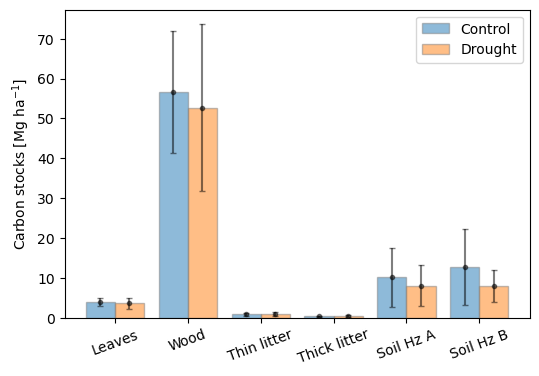

In [184]:
tit=con.columns[2:]
mm=np.zeros([2,6]); sd=np.zeros([2,6])
for i in range(len(tit)):
    mm[0,i]=con[tit[i]].mean(); sd[0,i]=con[tit[i]].std()
    mm[1,i]=dro[tit[i]].mean(); sd[1,i]=dro[tit[i]].std()

fig=plt.subplots(figsize=(6,4)) 
barWidth=0.4 
br1=np.arange(len(tit)) 
br2=[x+barWidth for x in br1] 

plt.bar(br1,mm[0,],width=barWidth,edgecolor='grey',label ='Control',alpha=0.5) 
plt.bar(br2,mm[1,],width=barWidth,edgecolor='grey',label ='Drought',alpha=0.5) 
plt.errorbar(br1,mm[0,],sd[0,],fmt='.',color='Black',alpha=0.5,capsize=2)
plt.errorbar(br2,mm[1,],sd[1,],fmt='.',color='Black',alpha=0.5,capsize=2)
plt.ylabel('Carbon stocks [Mg ha$^{-1}$]') 
plt.xticks([r+barWidth/2 for r in range(len(tit))],tit,rotation=20)
plt.legend()

### Demographic structure

In [186]:
#data=pd.read_excel('~\\Model_Prades\\Data\\Estructura demográfica Prades.xlsx')
data=pd.read_excel('Data/Estructura demográfica Prades.xlsx')

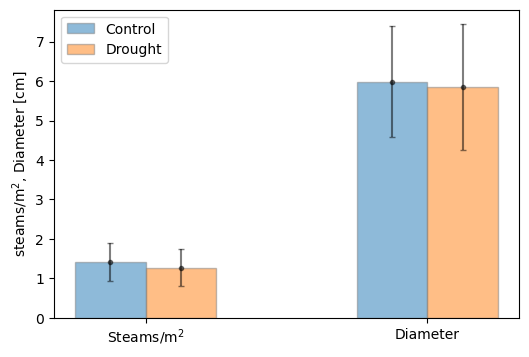

In [187]:
con=data[data['treatment']=='control']
dro=data[data['treatment']=='drought']

fig=plt.subplots(figsize=(6,4)) 
barWidth=0.25 
br1=np.arange(2) 
br2=[x+barWidth for x in br1]

plt.bar(br1,con[con.columns[2:]].mean(),width=barWidth,edgecolor='grey',label ='Control',alpha=0.5) 
plt.bar(br2,dro[dro.columns[2:]].mean(),width=barWidth,edgecolor='grey',label ='Drought',alpha=0.5) 

plt.errorbar(br1,con[con.columns[2:]].mean(),con[con.columns[2:]].std(),fmt='.',color='Black',alpha=0.5,capsize=2)
plt.errorbar(br2,dro[dro.columns[2:]].mean(),dro[dro.columns[2:]].std(),fmt='.',color='Black',alpha=0.5,capsize=2)
plt.ylabel('steams/m$^2$, Diameter [cm]') 
plt.xticks([r+barWidth/2 for r in range(2)],['Steams/m$^2$','Diameter'])
plt.legend()

### Meteo variables

In [118]:
#data=pd.read_csv('~\\Model_Prades\\Data\\Climate\\Prades_hourly.csv')
data=pd.read_csv('Data/Climate/Prades_hourly.csv')

data['datetime']=pd.to_datetime(data.datetime)

Text(0, 0.5, 'WS [m s$^{-1}$]')

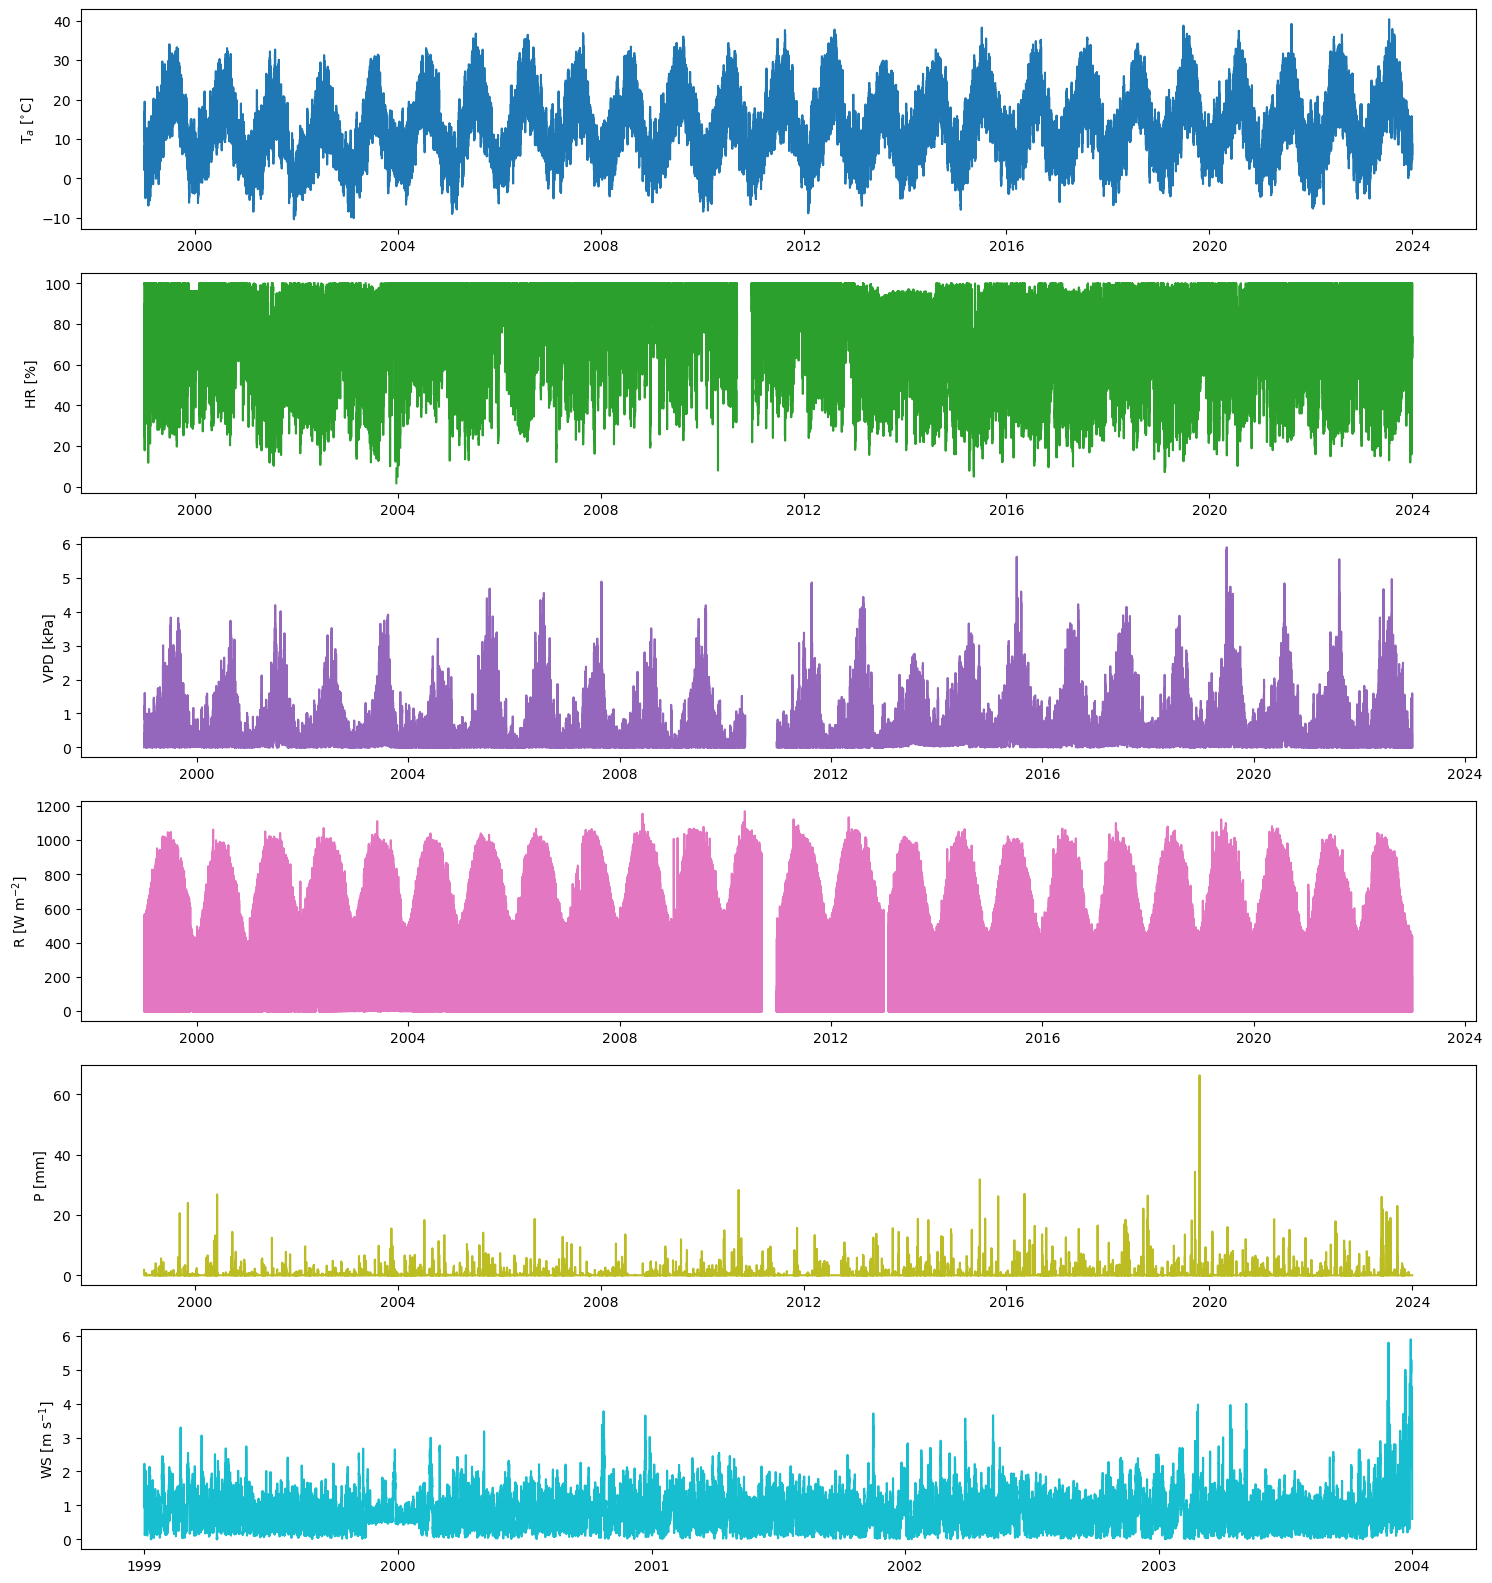

In [119]:
fig,axs=plt.subplots(6,1,figsize=[18,20])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,6))
axs[0].plot(data.datetime,data.Ta,color=colors[0])
axs[0].set_ylabel('T$_a$ [$^{\\circ}$C]')

axs[1].plot(data.datetime,data.HR,color=colors[1])
axs[1].set_ylabel('HR [%]')

axs[2].plot(data.datetime,data.VPD,color=colors[2])
axs[2].set_ylabel('VPD [kPa]')

axs[3].plot(data.datetime,data.R,color=colors[3])
axs[3].set_ylabel('R [W m$^{-2}$]')
                  
axs[4].plot(data.datetime,data.P,color=colors[4])
axs[4].set_ylabel('P [mm]')

#axs[5].plot(data.datetime,data.maxWS,color=colors[0])
axs[5].plot(data.datetime,data.meanWS,color=colors[5])
axs[5].set_ylabel('WS [m s$^{-1}$]')

### Meteo variables during the field trip (30-04 to 03-05 2023)

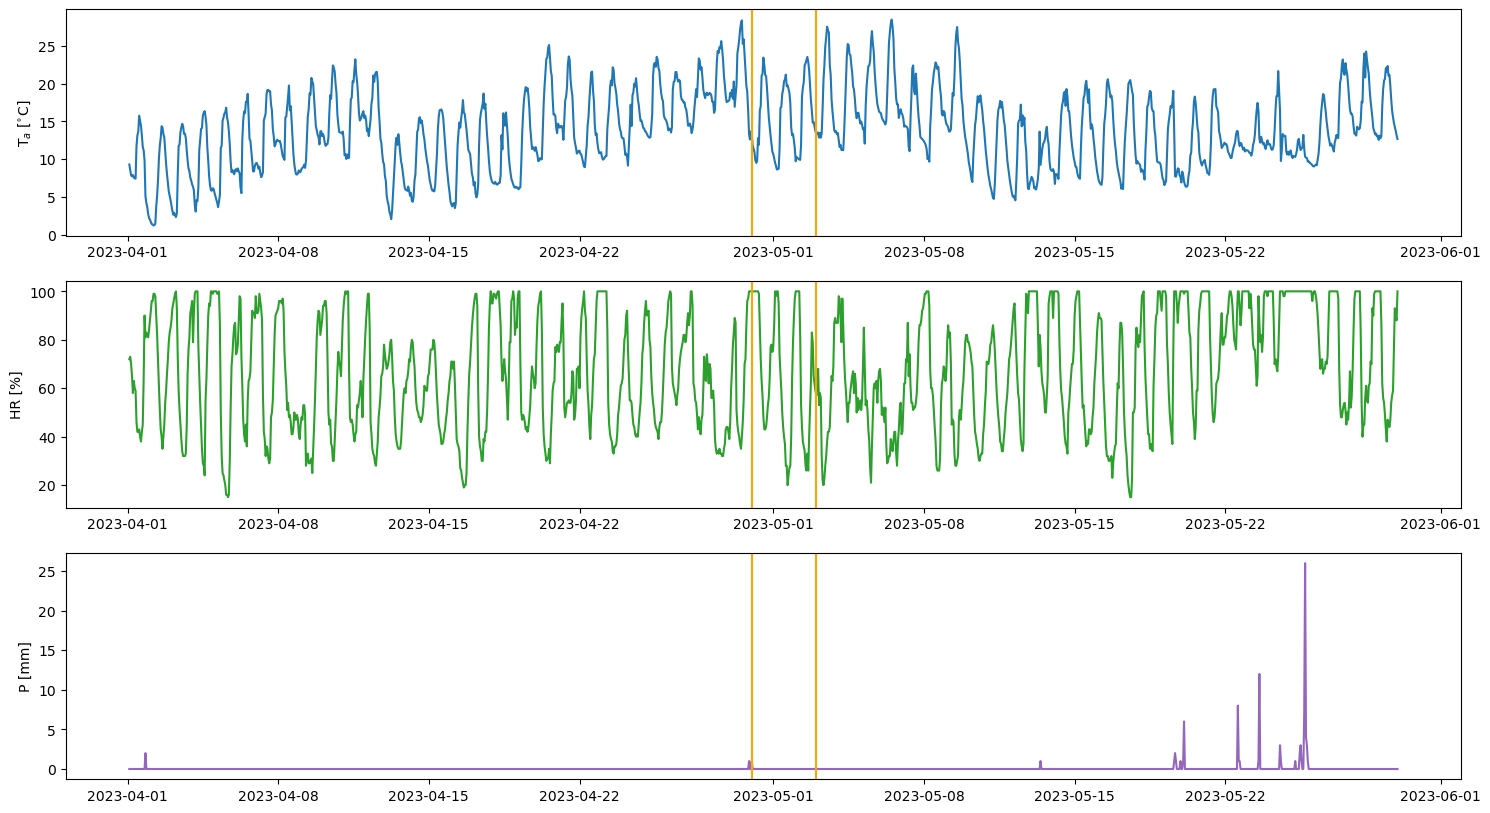

In [142]:
mask=(data.datetime > '2023-4-1 01:00:00') & (data.datetime < '2023-5-30 01:00:00')
data_ft=data.loc[mask]

fig,axs=plt.subplots(3,1,figsize=[18,10])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,6))
axs[0].plot(data_ft.datetime,data_ft.Ta,color=colors[0])
axs[0].set_ylabel('T$_a$ [$^{\\circ}$C]')
axs[0].axvline(dt.datetime(2023,4,30),color='orange')
axs[0].axvline(dt.datetime(2023,5,3),color='orange')

axs[1].plot(data_ft.datetime,data_ft.HR,color=colors[1])
axs[1].set_ylabel('HR [%]')
axs[1].axvline(dt.datetime(2023,4,30),color='orange')
axs[1].axvline(dt.datetime(2023,5,3),color='orange')

axs[2].plot(data_ft.datetime,data_ft.P,color=colors[2])
axs[2].set_ylabel('P [mm]')
axs[2].axvline(dt.datetime(2023,4,30),color='orange')
axs[2].axvline(dt.datetime(2023,5,3),color='orange')

# #axs[5].plot(data.datetime,data.maxWS,color=colors[0])
# axs[5].plot(data.datetime,data.meanWS,color=colors[5])
# axs[5].set_ylabel('WS [m s$^{-1}$]')

### Soil moisture

In [90]:
#data_sm=pd.read_excel('~\\Model_Prades\\Data\\Climate\\Soil_Moisture\\SM_Prades.xlsx')
data_sm=pd.read_excel('Data/Climate/Soil_moisture/SM_Prades.xlsx')
data_sm['datetime']=pd.to_datetime(data_sm.dia)
data_sm.loc[(data_sm['Hum sòl (% v/v)']<0) | (data_sm['Hum sòl (% v/v)']>100),'Hum sòl (% v/v)']=np.nan

Text(0.5, 1.0, 'Drought plots')

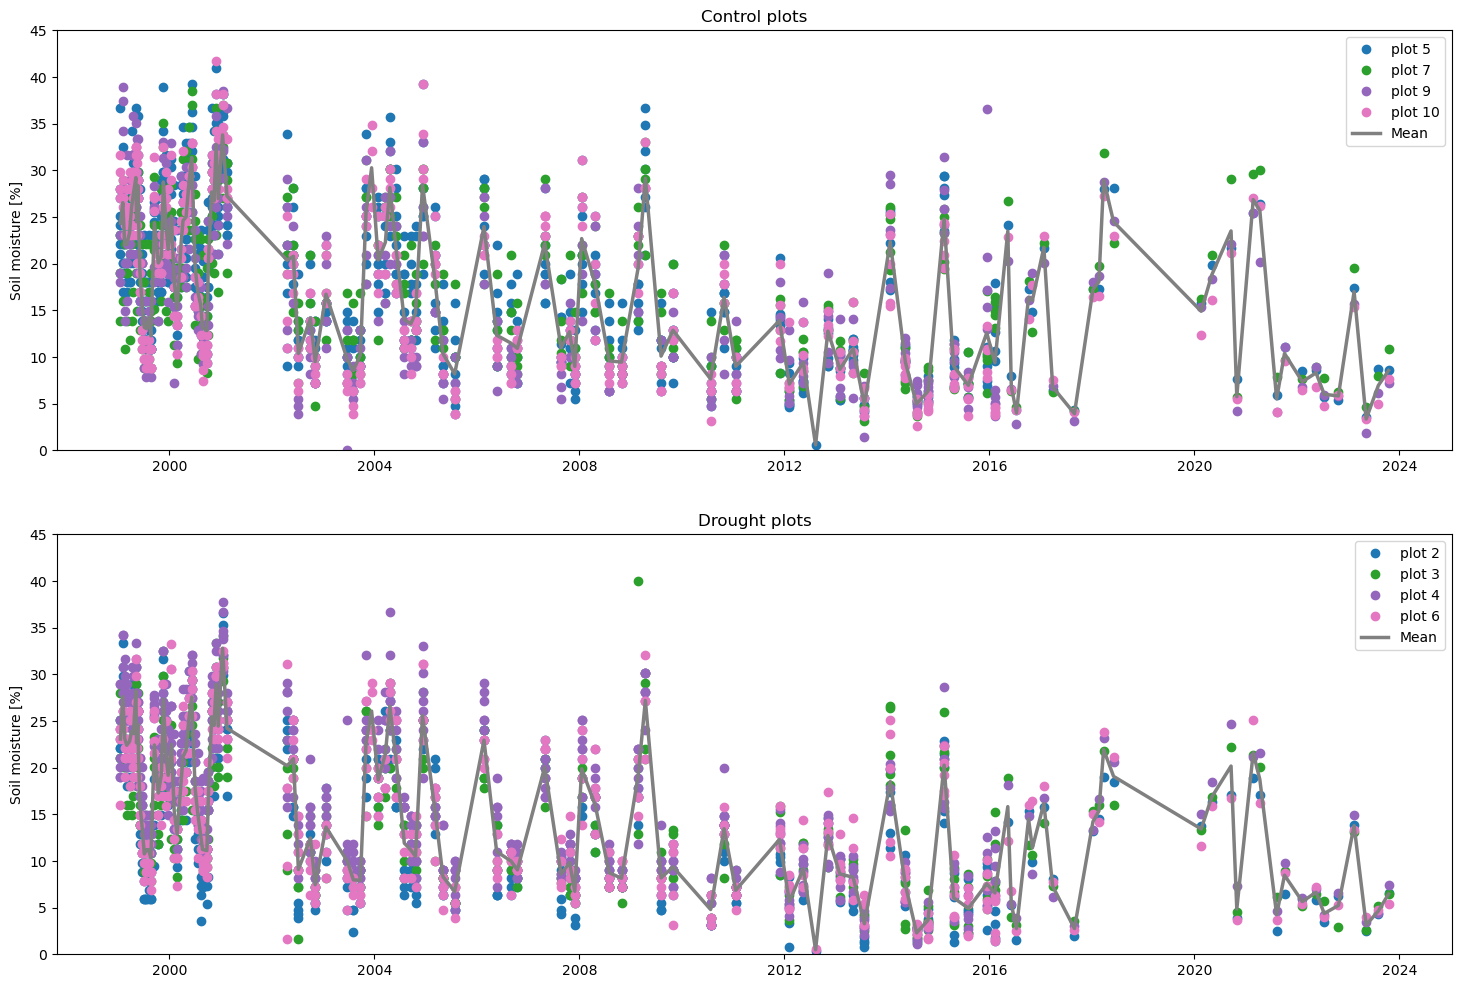

In [91]:
con=data_sm[data_sm.tractament=='control']
dro=data_sm[data_sm.tractament=='sequera']

fig,axs=plt.subplots(2,1,figsize=[18,12])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,6))

for i in range(4):
    axs[0].plot(con[con['parcel.la']==control[i]].datetime,con[con['parcel.la']==control[i]]['Hum sòl (% v/v)'],
                'o',color=colors[i],label='plot '+str(control[i]))
    axs[1].plot(dro[dro['parcel.la']==drought[i]].datetime,dro[dro['parcel.la']==drought[i]]['Hum sòl (% v/v)'],
                'o',color=colors[i],label='plot '+str(drought[i]))
    if i==3:
        w=con[['datetime',con.columns[4]]]
        times=w.datetime.unique().tolist()
        mean=np.zeros(len(times))
        for k in range(len(times)):mean[k]=w[w.datetime==times[k]].mean().iloc[1]
        axs[0].plot(times,mean,color='gray',label='Mean',linewidth=2.5)
        
        w=dro[['datetime',dro.columns[4]]]
        times=w.datetime.unique().tolist()
        mean=np.zeros(len(times))
        for k in range(len(times)):mean[k]=w[w.datetime==times[k]].mean().iloc[1]
        axs[1].plot(times,mean,color='gray',label='Mean',linewidth=2.5)
    
axs[0].set_ylim(0,45); axs[1].set_ylim(0,45)      
axs[0].set_ylabel('Soil moisture [%]'); axs[1].set_ylabel('Soil moisture [%]') 
axs[0].legend();axs[1].legend()
axs[0].set_title('Control plots'); axs[1].set_title('Drought plots')

## Data from field trip

### Carbon and nitrogen -- Soil

In [481]:
data=pd.read_excel('Data/LabResults/Soil_Ctotal-Ntotal.xlsx',header=11)

depths=data.SN2.unique()
temp=re.compile("([a-zA-Z]+)([0-9]+)")
plot=np.empty(len(data),dtype=int)
for i in range(len(data)):
    b=data['Sample name'][i].split('_')[1]
    plot[i]=temp.match(b).groups()[1]
data['plot']=plot

con=data[data['plot'].isin(control)] 
dro=data[data['plot'].isin(drought)] 

/tmp/ipykernel_8497/479169169.py:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  if len(w)==1:res1[i,j]=w.Result
/tmp/ipykernel_8497/479169169.py:23: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  if len(w)==1:res2[i,j]=w2.Result
/home/_ehoyos/anaconda3/lib/python3.9/site-packages/matplotlib/axes/_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/tmp/ipykernel_8497/479169169.py:47: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  if len(w)==1:res1[i,j]=w.Result
/tmp/ipykernel_8497/479169169.py:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  if len(w)=

Text(0.5, 1.0, '% Nitrogen, drought plots')

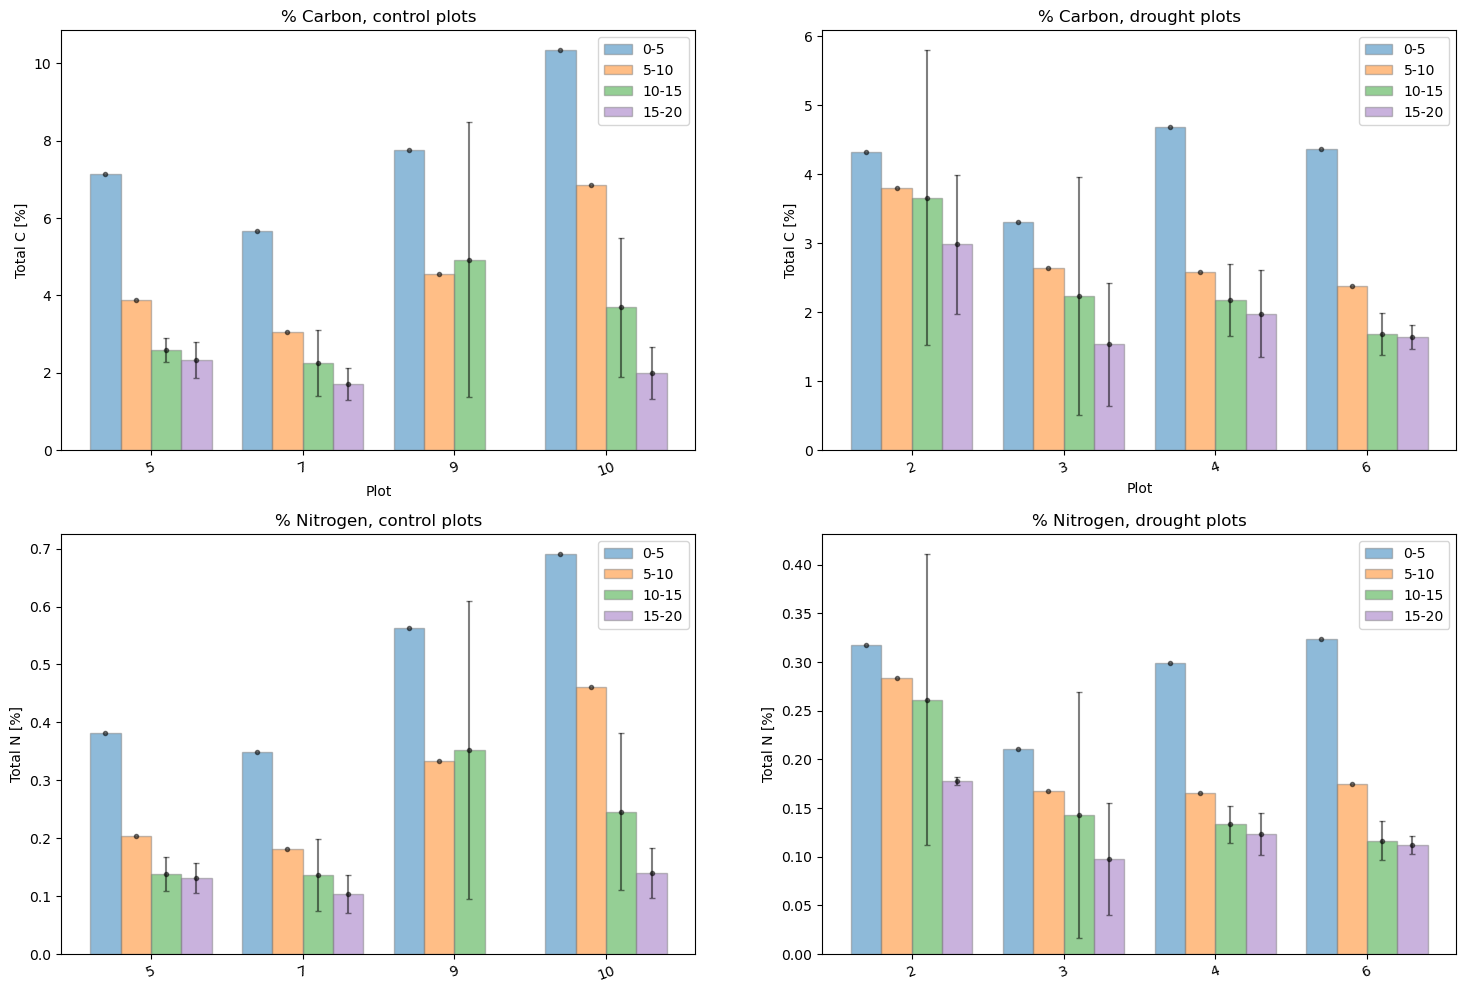

In [482]:
conC=con[con.Parameter=='Ctotal']; droC=dro[dro.Parameter=='Ctotal']
conN=con[con.Parameter=='Ntotal']; droN=dro[dro.Parameter=='Ntotal']
fig,axs=plt.subplots(2,2,figsize=[18,12])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,8))

barWidth=0.20
br1=np.arange(4)
br2=[x+barWidth for x in br1] 
br3=[x+barWidth for x in br2]
br4=[x+barWidth for x in br3]
br=[br1,br2,br3,br4]

## Carbon
res1=np.zeros([4,len(depths)])*np.nan; std1=np.zeros([4,len(depths)])*np.nan
res2=np.zeros([4,len(depths)])*np.nan; std2=np.zeros([4,len(depths)])*np.nan
for i in range(4):
    for j in range(len(depths)):
        w=conC[(conC['plot']==control[i])&(conC['SN2']==depths[j])]
        if len(w)==1:res1[i,j]=w.Result
        else:res1[i,j]=w.Result.mean();std1[i,j]=w.Result.std()
        w2=droC[(droC['plot']==drought[i])&(droC['SN2']==depths[j])]
        if len(w)==1:res2[i,j]=w2.Result
        else:res2[i,j]=w2.Result.mean();std2[i,j]=w2.Result.std()

for i in range(len(depths)):
    axs[0,0].bar(br[i],res1[:,i],width=barWidth,edgecolor='grey',label=depths[i],color=colors[i],alpha=0.5) 
    axs[0,0].errorbar(br[i],res1[:,i],std1[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)
    axs[0,1].bar(br[i],res2[:,i],width=barWidth,edgecolor='grey',label=depths[i],color=colors[i],alpha=0.5) 
    axs[0,1].errorbar(br[i],res2[:,i],std2[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)
axs[0,0].legend()
axs[0,0].set_xticks([r+barWidth*1.5 for r in range(len(control))],control,rotation=20)
axs[0,0].set_ylabel('Total C [%]');axs[0,0].set_xlabel('Plot')
axs[0,0].set_title('% Carbon, control plots')
axs[0,1].legend()
axs[0,1].set_xticks([r+barWidth*1.5 for r in range(len(drought))],drought,rotation=20)
axs[0,1].set_ylabel('Total C [%]');axs[0,1].set_xlabel('Plot')
axs[0,1].set_title('% Carbon, drought plots')    

##Nitrogen

res1=np.zeros([4,len(depths)])*np.nan; std1=np.zeros([4,len(depths)])*np.nan
res2=np.zeros([4,len(depths)])*np.nan; std2=np.zeros([4,len(depths)])*np.nan
for i in range(4):
    for j in range(len(depths)):
        w=conN[(conN['plot']==control[i])&(conN['SN2']==depths[j])]
        if len(w)==1:res1[i,j]=w.Result
        else:res1[i,j]=w.Result.mean();std1[i,j]=w.Result.std()
        w2=droN[(droN['plot']==drought[i])&(droN['SN2']==depths[j])]
        if len(w)==1:res2[i,j]=w2.Result
        else:res2[i,j]=w2.Result.mean();std2[i,j]=w2.Result.std()

for i in range(len(depths)):
    axs[1,0].bar(br[i],res1[:,i],width=barWidth,edgecolor='grey',label=depths[i],color=colors[i],alpha=0.5) 
    axs[1,0].errorbar(br[i],res1[:,i],std1[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)
    axs[1,1].bar(br[i],res2[:,i],width=barWidth,edgecolor='grey',label=depths[i],color=colors[i],alpha=0.5) 
    axs[1,1].errorbar(br[i],res2[:,i],std2[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)
axs[1,0].legend()
axs[1,0].set_xticks([r+barWidth*1.5 for r in range(len(control))],control,rotation=20)
axs[1,0].set_ylabel('Total N [%]');axs[0,0].set_xlabel('Plot')
axs[1,0].set_title('% Nitrogen, control plots')
axs[1,1].legend()
axs[1,1].set_xticks([r+barWidth*1.5 for r in range(len(drought))],drought,rotation=20)
axs[1,1].set_ylabel('Total N [%]');axs[0,1].set_xlabel('Plot')
axs[1,1].set_title('% Nitrogen, drought plots') 

Text(0.5, 1.0, '% Nitrogen')

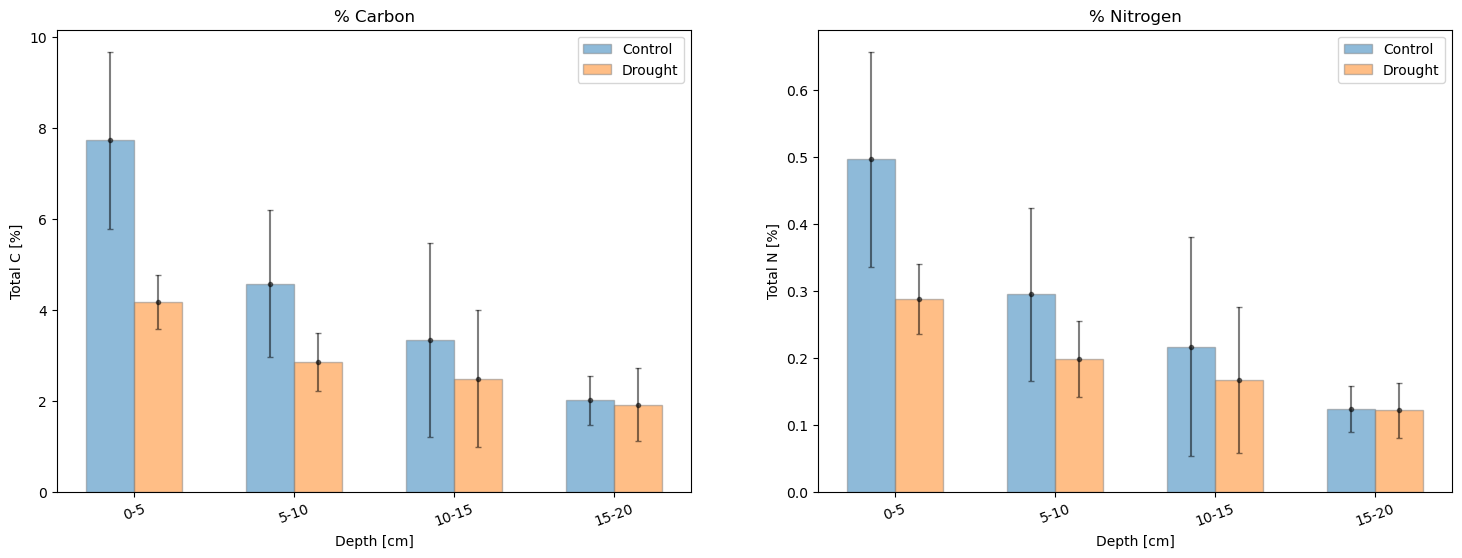

In [483]:
fig,axs=plt.subplots(1,2,figsize=[18,6])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,8))
treat=['Control','Drought']

barWidth=0.3
br1=np.arange(4)
br2=[x+barWidth for x in br1] 
br=[br1,br2]

## Carbon
res=np.zeros([2,len(depths)])*np.nan; std=np.zeros([2,len(depths)])*np.nan
for j in range(len(depths)):
    w=conC[conC['SN2']==depths[j]]
    res[0,j]=w.Result.mean();std[0,j]=w.Result.std()
    w=droC[droC['SN2']==depths[j]]
    res[1,j]=w.Result.mean();std[1,j]=w.Result.std()
for i in range(2):
    axs[0].bar(br[i],res[i,:],width=barWidth,edgecolor='grey',label=treat[i],color=colors[i],alpha=0.5) 
    axs[0].errorbar(br[i],res[i,:],std[i,:],fmt='.',color='Black',alpha=0.5,capsize=2)
axs[0].legend()
axs[0].set_xticks([r+barWidth/2 for r in range(len(depths))],depths,rotation=20)
axs[0].set_ylabel('Total C [%]');axs[0].set_xlabel('Depth [cm]')
axs[0].set_title('% Carbon')

## Nitrogen
res=np.zeros([2,len(depths)])*np.nan; std=np.zeros([2,len(depths)])*np.nan
for j in range(len(depths)):
    w=conN[conN['SN2']==depths[j]]
    res[0,j]=w.Result.mean();std[0,j]=w.Result.std()
    w=droN[droN['SN2']==depths[j]]
    res[1,j]=w.Result.mean();std[1,j]=w.Result.std()
for i in range(2):
    axs[1].bar(br[i],res[i,:],width=barWidth,edgecolor='grey',label=treat[i],color=colors[i],alpha=0.5) 
    axs[1].errorbar(br[i],res[i,:],std[i,:],fmt='.',color='Black',alpha=0.5,capsize=2)
axs[1].legend()
axs[1].set_xticks([r+barWidth/2 for r in range(len(depths))],depths,rotation=20)
axs[1].set_ylabel('Total N [%]');axs[1].set_xlabel('Depth [cm]')
axs[1].set_title('% Nitrogen')

### Carbon -- Vegetation (Roots, Fine litter, Coarse litter)

In [295]:
df1=pd.read_excel('Data/LabResults/Veg_d13C_C_Box1.xls',sheet_name=1,header=10)
df2=pd.read_excel('Data/LabResults/Veg_d13C_C_Box2.xls',sheet_name=1,header=10)
data=pd.concat([df1, df2]); data=data.reset_index(drop=True)
temp=re.compile("([a-zA-Z]+)([0-9]+)")
plot=np.empty(len(data),dtype=int); depth=['']*len(data)

poold=data.columns[2]
roots=data[data[poold]=='Roots']; roots=roots.reset_index(drop=True)
litterF=data[data[poold]=='Fine Litter']; litterF=litterF.reset_index(drop=True)
litterC=data[data[poold]=='Coarse Litter ']; litterC=litterC.reset_index(drop=True)

temp=re.compile("([a-zA-Z]+)([0-9]+)")
plot=np.empty(len(roots),dtype=int); depth=['']*len(roots)
for i in range(len(roots)):
    b=roots[roots.columns[3]][i].split('_')[1]
    plot[i]=temp.match(b).groups()[1]
    depth[i]=(roots[roots.columns[3]][i].split('_')[-1]).split(' ')[-1]
roots['plot']=plot; roots['depth']=depth

plot=np.empty(len(litterF),dtype=int)
for i in range(len(litterF)):
    b=litterF[litterF.columns[3]][i].split('_')[1]
    plot[i]=temp.match(b).groups()[1]
litterF['plot']=plot

plot=np.empty(len(litterC),dtype=int)
for i in range(len(litterC)):
    b=litterC[litterC.columns[3]][i].split('_')[1]
    plot[i]=temp.match(b).groups()[1]
litterC['plot']=plot

Text(0.5, 1.0, 'Course litter, drought plots')

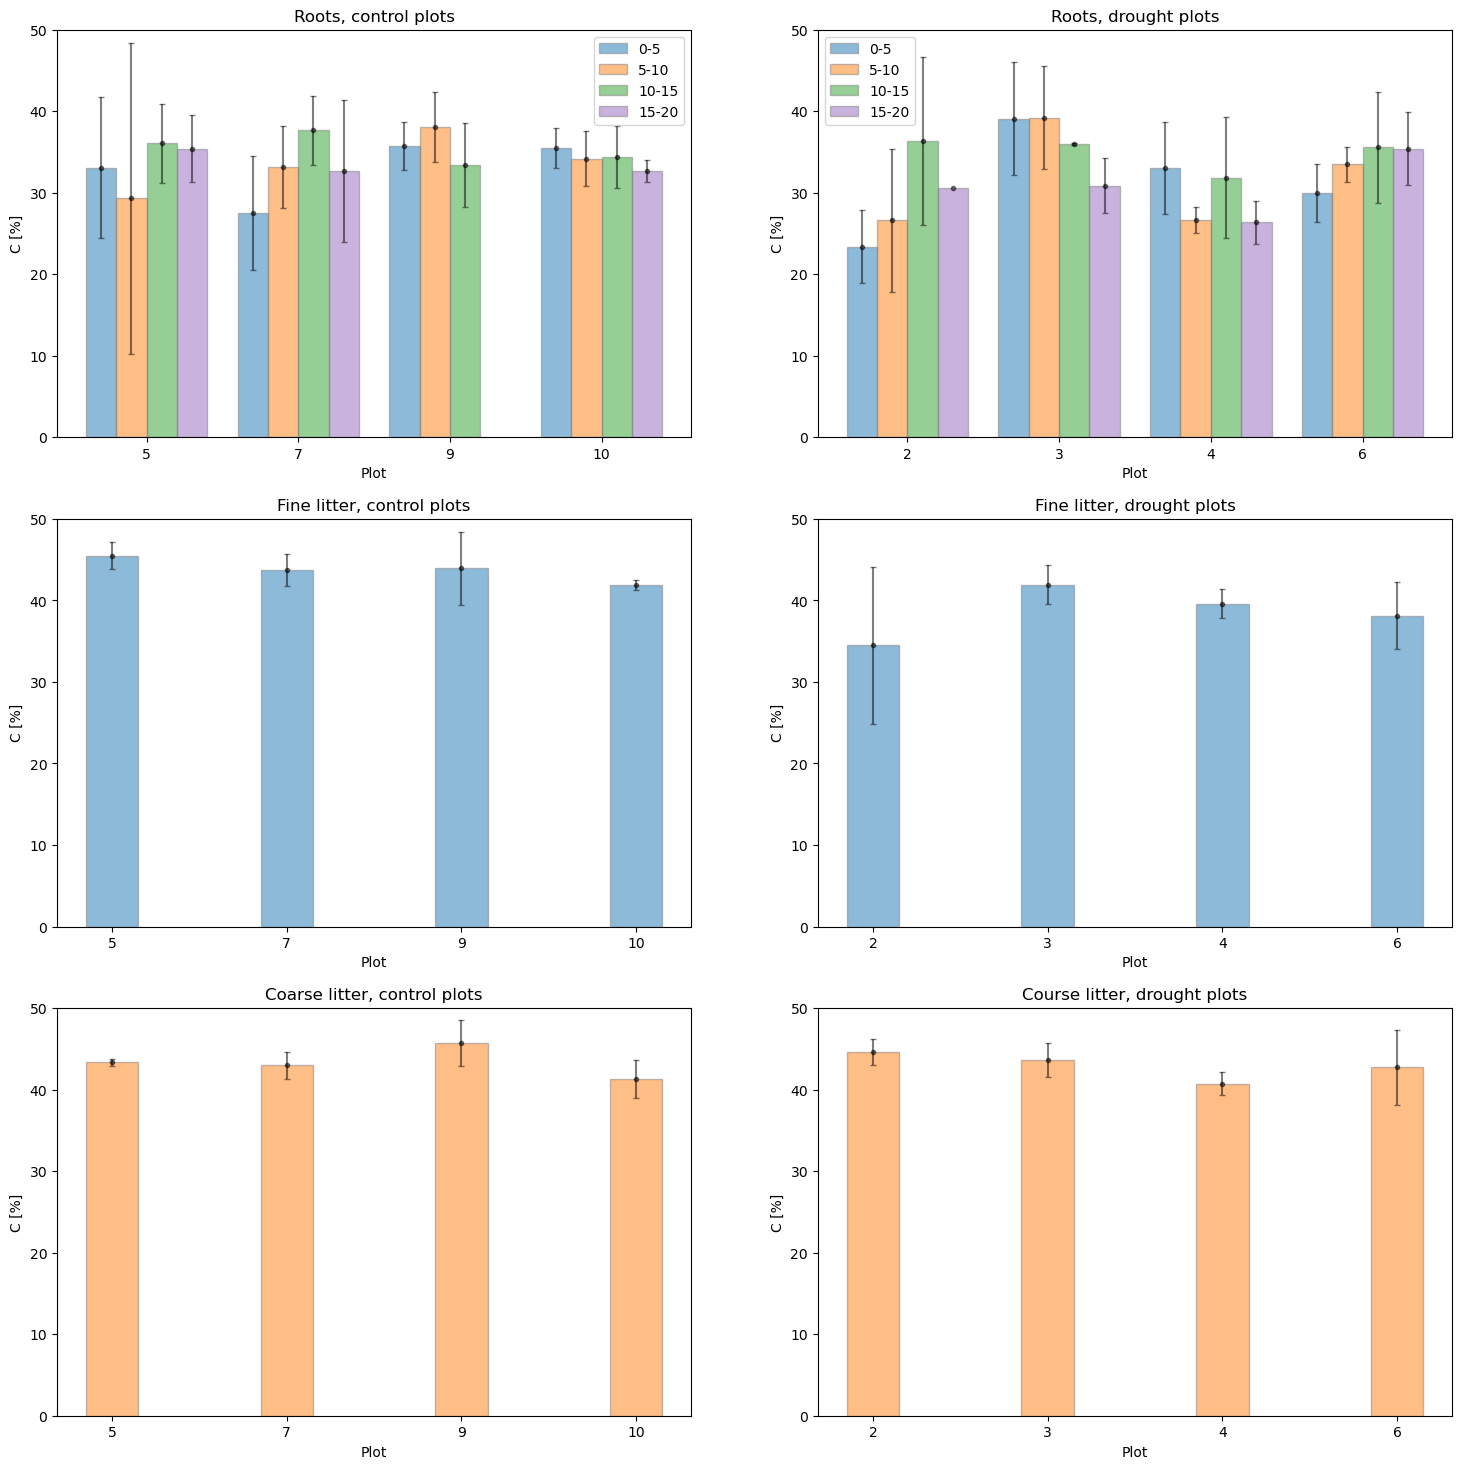

In [296]:
fig,axs=plt.subplots(3,2,figsize=[18,18])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,8))
barWidth=0.20

## Roots
depths=roots.depth.unique()
df=roots
con=df[df['plot'].isin(control)] 
dro=df[df['plot'].isin(drought)] 

res1=np.zeros([4,len(depths)])*np.nan; std1=np.zeros([4,len(depths)])*np.nan
res2=np.zeros([4,len(depths)])*np.nan; std2=np.zeros([4,len(depths)])*np.nan
for i in range(4):
    for j in range(len(depths)):
        w=con[(con['plot']==control[i])&(con['depth']==depths[j])]
        res1[i,j]=w.concentration.mean();std1[i,j]=w.concentration.std()
        w=dro[(dro['plot']==drought[i])&(dro['depth']==depths[j])]
        res2[i,j]=w.concentration.mean();std2[i,j]=w.concentration.std()

br1=np.arange(len(depths))
br2=[x+barWidth for x in br1] 
br3=[x+barWidth for x in br2]
br4=[x+barWidth for x in br3]
br=[br1,br2,br3,br4]

for i in range(len(depths)):
    axs[0,0].bar(br[i],res1[:,i],width=barWidth,edgecolor='grey',label=depths[i],color=colors[i],alpha=0.5) 
    axs[0,0].errorbar(br[i],res1[:,i],std1[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)
    axs[0,1].bar(br[i],res2[:,i],width=barWidth,edgecolor='grey',label=depths[i],color=colors[i],alpha=0.5) 
    axs[0,1].errorbar(br[i],res2[:,i],std2[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)
axs[0,0].legend();axs[0,1].legend()
axs[0,0].set_xticks([r+barWidth*1.5 for r in range(len(control))],control)
axs[0,1].set_xticks([r+barWidth*1.5 for r in range(len(drought))],drought)
axs[0,0].set_ylabel('C [%]');axs[0,1].set_ylabel('C [%]')
axs[0,0].set_xlabel('Plot'); axs[0,1].set_xlabel('Plot')
axs[0,0].set_title('Roots, control plots'); axs[0,1].set_title('Roots, drought plots')
axs[0,0].set_ylim(0,50); axs[0,1].set_ylim(0,50)

# Fine litter
df=litterF
con=df[df['plot'].isin(control)] 
dro=df[df['plot'].isin(drought)] 

res=np.zeros([2,4])*np.nan; std=np.zeros([2,4])*np.nan
#res2=np.zeros(4)*np.nan; std2=np.zeros(4)*np.nan
for i in range(4):
    w=con[con['plot']==control[i]]
    res[0,i]=w.concentration.mean();std[0,i]=w.concentration.std()
    w=dro[dro['plot']==drought[i]]
    res[1,i]=w.concentration.mean();std[1,i]=w.concentration.std()
for i in range(2):
    axs[1,i].bar(br[0],res[i,:],width=barWidth+.1,edgecolor='grey',color=colors[0],alpha=0.5) 
    axs[1,i].errorbar(br[0],res[i,:],std[i,:],fmt='.',color='Black',alpha=0.5,capsize=2)
    axs[1,i].set_ylabel('C [%]'); axs[1,i].set_xlabel('Plot'); axs[1,i].set_ylim(0,50)
axs[1,0].set_xticks([r for r in range(len(control))],control)
axs[1,1].set_xticks([r for r in range(len(drought))],drought)
axs[1,0].set_title('Fine litter, control plots'); axs[1,1].set_title('Fine litter, drought plots')

# Course litter
df=litterC
con=df[df['plot'].isin(control)] 
dro=df[df['plot'].isin(drought)] 

res=np.zeros([2,4])*np.nan; std=np.zeros([2,4])*np.nan
for i in range(4):
    w=con[con['plot']==control[i]]
    res[0,i]=w.concentration.mean();std[0,i]=w.concentration.std()
    w=dro[dro['plot']==drought[i]]
    res[1,i]=w.concentration.mean();std[1,i]=w.concentration.std()
for i in range(2):
    axs[2,i].bar(br[0],res[i,:],width=barWidth+.1,edgecolor='grey',color=colors[1],alpha=0.5) 
    axs[2,i].errorbar(br[0],res[i,:],std[i,:],fmt='.',color='Black',alpha=0.5,capsize=2)
    axs[2,i].set_ylabel('C [%]'); axs[2,i].set_xlabel('Plot'); axs[2,i].set_ylim(0,50)
axs[2,0].set_xticks([r for r in range(len(control))],control)
axs[2,1].set_xticks([r for r in range(len(drought))],drought)
axs[2,0].set_title('Coarse litter, control plots'); axs[2,1].set_title('Course litter, drought plots')


Text(0.5, 1.0, 'Litter')

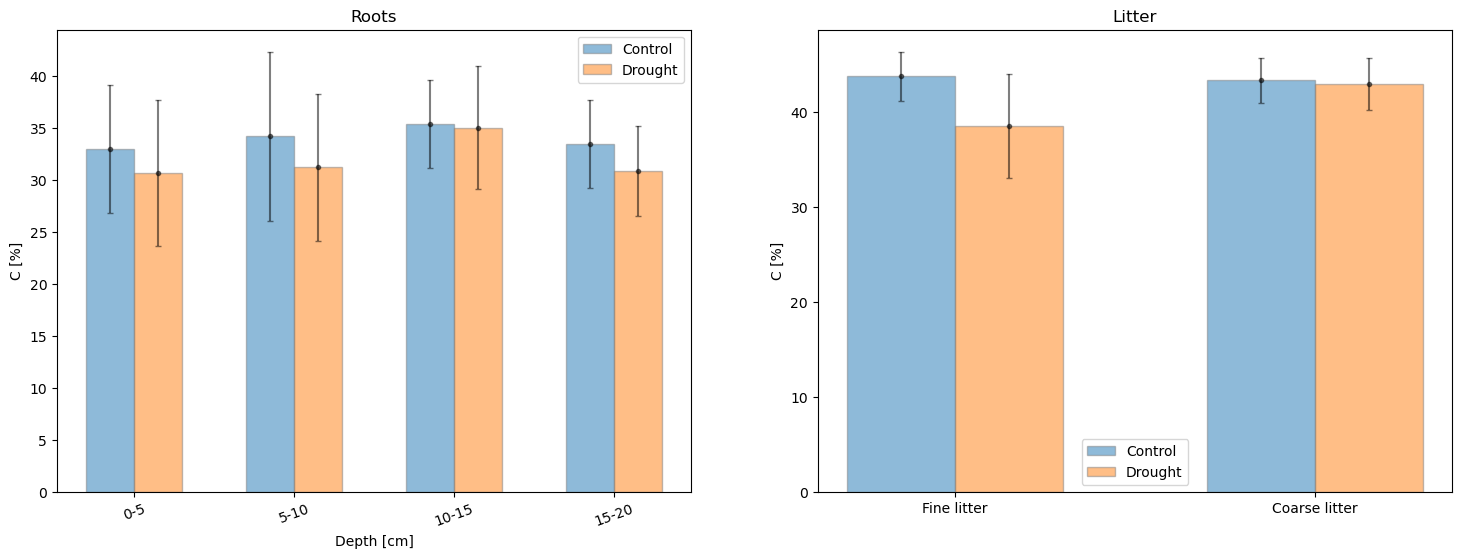

In [268]:
fig,axs=plt.subplots(1,2,figsize=[18,6])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,8))
barWidth=0.20

# Roots
depths=roots.depth.unique()
df=roots
con=df[df['plot'].isin(control)] 
dro=df[df['plot'].isin(drought)]

res=np.zeros([2,len(depths)])*np.nan; std=np.zeros([2,len(depths)])*np.nan
for j in range(len(depths)):
    w=con[con['depth']==depths[j]]
    res[0,j]=w.concentration.mean();std[0,j]=w.concentration.std()
    w=dro[dro['depth']==depths[j]]
    res[1,j]=w.concentration.mean();std[1,j]=w.concentration.std()

treat=['Control','Drought']
barWidth=0.3
br1=np.arange(4)
br2=[x+barWidth for x in br1] 
br=[br1,br2]

for i in range(2):
    axs[0].bar(br[i],res[i,:],width=barWidth,edgecolor='grey',label=treat[i],color=colors[i],alpha=0.5) 
    axs[0].errorbar(br[i],res[i,:],std[i,:],fmt='.',color='Black',alpha=0.5,capsize=2)
axs[0].legend()
axs[0].set_xticks([r+barWidth/2 for r in range(len(depths))],depths,rotation=20)
axs[0].set_ylabel('C [%]');axs[0].set_xlabel('Depth [cm]')
axs[0].set_title('Roots')

## Litter
res=np.zeros([2,2])*np.nan; std=np.zeros([2,4])*np.nan
df=litterF
con=df[df['plot'].isin(control)]; dro=df[df['plot'].isin(drought)] 
res[0,0]=con.concentration.mean();std[0,0]=con.concentration.std()
res[0,1]=dro.concentration.mean();std[0,1]=dro.concentration.std()
df=litterC
con=df[df['plot'].isin(control)]; dro=df[df['plot'].isin(drought)] 
res[1,0]=con.concentration.mean();std[1,0]=con.concentration.std()
res[1,1]=dro.concentration.mean();std[1,1]=dro.concentration.std()

barWidth=0.3
br1=np.arange(2)
br2=[x+barWidth for x in br1] 
br=[br1,br2]

for i in range(2):
    axs[1].bar(br[i],res[:,i],width=barWidth,edgecolor='grey',label=treat[i],color=colors[i],alpha=0.5) 
    axs[1].errorbar(br[i],res[:,i],std[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)
axs[1].legend()
axs[1].set_xticks([r+barWidth/2 for r in range(2)],['Fine litter','Coarse litter'])
axs[1].set_ylabel('C [%]')
axs[1].set_title('Litter')

In [265]:
dro.concentration.std()

2.7627186565829707

In [252]:
dro.concentration.mean()

42.94052717452373

### F$^{14}$C soil respiration 

In [484]:
data=pd.read_excel('Data/LabResults/Soil_respiration_field.xlsx',header=30)
data['datetime'] = pd.to_datetime(data['Collection_date'].dt.strftime('%Y-%m-%d') + data['Collection_time'].astype(str), format = '%Y-%m-%d%H:%M:%S')
plot=np.empty(len(data),dtype=int); treatment=['']*len(data)
for i in range(len(data)):
    plot[i]=data['Probe'][i].split('_')[3]
    treatment[i]=data['Probe'][i].split('_')[4]
data['plot']=plot; data['treatment']=treatment

con=data[data['plot'].isin(control)] ; conf=con
dro=data[data['plot'].isin(drought)] ; drof=dro

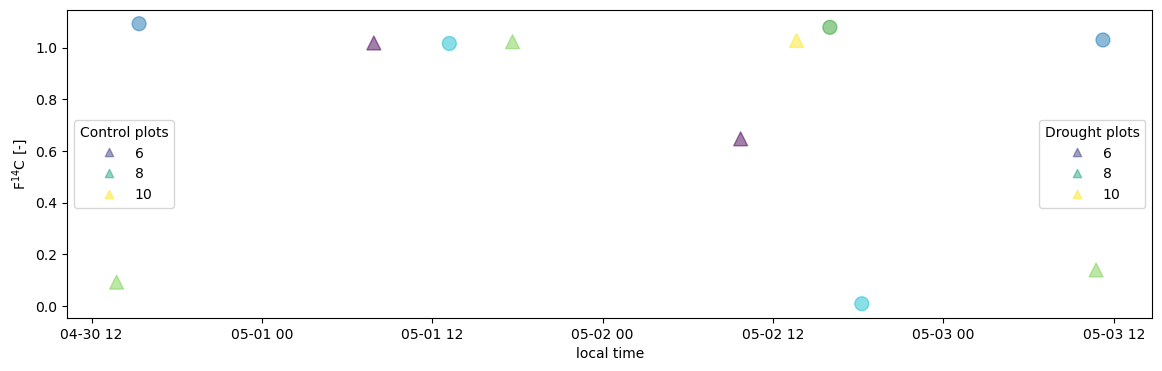

In [430]:
fig=plt.subplots(figsize=[14,4])
scatter1=plt.scatter(con.datetime,con.F14C,c=con['plot'],marker='^',alpha=0.5,s=100)
legend1=plt.legend(*scatter1.legend_elements(num=3),title="Control plots",loc="center left")
plt.gca().add_artist(legend1)
scatter2=plt.scatter(dro.datetime,dro.F14C,c=dro['plot'],cmap=plt.cm.tab10,marker='o',alpha=0.5,s=100)
plt.ylabel('F$^{14}$C [-]'); plt.xlabel('local time')
legend2=plt.legend(*scatter1.legend_elements(num=3),title='Drought plots')


/tmp/ipykernel_8497/876215722.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  if len(w)==1: res[0,i]=w.F14C


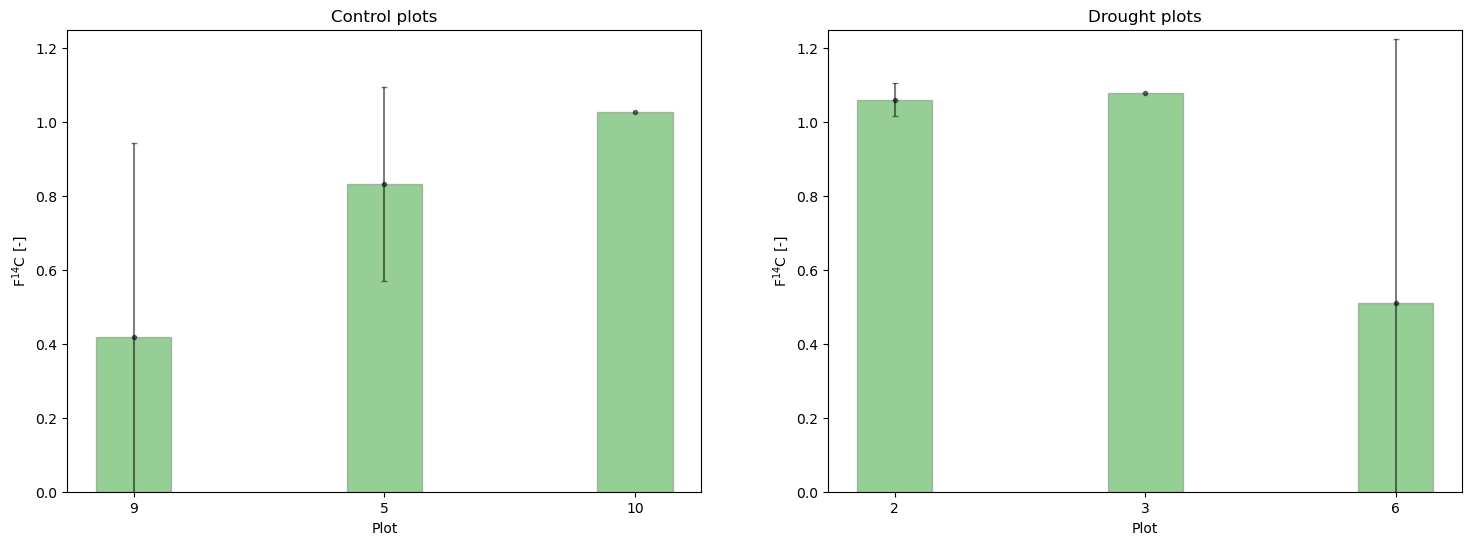

In [269]:
fig,axs=plt.subplots(1,2,figsize=[18,6])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,8))

barWidth=0.30
br=np.arange(3)

res=np.zeros([2,3])*np.nan; std=np.zeros([2,3])*np.nan
control2=con['plot'].unique(); drought2=dro['plot'].unique()
for i in range(3):
    w=con[con['plot']==control2[i]]; w=w[w.F14C.notnull()]
    if len(w)==1: res[0,i]=w.F14C
    else:res[0,i]=w.F14C.mean();std[0,i]=w.F14C.std()
    w=dro[dro['plot']==drought2[i]]
    if len(w)==1: res[1,i]=w.F14C
    else:res[1,i]=w.F14C.mean();std[1,i]=w.F14C.std()

axs[0].bar(br,res[0,],width=barWidth,edgecolor='grey',label=control2[i],color=colors[i],alpha=0.5) 
axs[0].errorbar(br,res[0,],std[0,],fmt='.',color='Black',alpha=0.5,capsize=2)
axs[1].bar(br,res[1,],width=barWidth,edgecolor='grey',label=drought[i],color=colors[i],alpha=0.5) 
axs[1].errorbar(br,res[1,],std[1,],fmt='.',color='Black',alpha=0.5,capsize=2)
axs[0].set_title('Control plots');axs[1].set_title('Drought plots')
axs[0].set_ylim(0,1.25);axs[1].set_ylim(0,1.25)
axs[0].set_xlabel('Plot');axs[1].set_xlabel('Plot')
axs[0].set_ylabel('F$^{14}$C [-]');axs[1].set_xlabel('Plot'); axs[1].set_ylabel('F$^{14}$C [-]');axs[1].set_xlabel('Plot')
axs[0].set_xticks([r for r in range(len(control2))],control2)
axs[1].set_xticks([r for r in range(len(drought2))],drought2)


(0.0, 0.6)

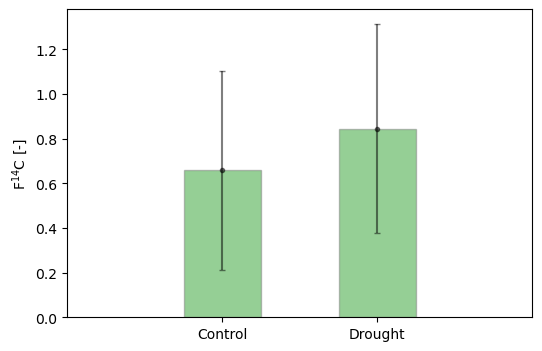

In [285]:
fig=plt.subplots(figsize=(6,4)) 
barWidth=0.1
br=[0.2,0.4]

res=np.zeros(2)*np.nan; std=np.zeros(2)*np.nan
w=con[con.F14C.notnull()];res[0]=w.F14C.mean(); std[0]=w.F14C.std()
w=dro[dro.F14C.notnull()];res[1]=w.F14C.mean(); std[1]=w.F14C.std()

plt.bar(br,res,width=barWidth,edgecolor='grey',label=control2[i],color=colors[i],alpha=0.5) 
plt.errorbar(br,res,std,fmt='.',color='Black',alpha=0.5,capsize=2)
plt.ylabel('F$^{14}$C [-]')
plt.xticks([r for r in br],['Control','Drought'])
plt.xlim(0,0.6)

### F$^{14}$C incubations

In [302]:
data=pd.read_excel('Data/LabResults/Soil_Incubations.xlsx',header=30)
temp=re.compile("([a-zA-Z]+)([0-9]+)")
plot=np.empty(len(data),dtype=int); depth=['']*len(data)
for i in range(len(data)):
    b=data['Probe'][i].split('_')[1]
    plot[i]=temp.match(b).groups()[1]
    depth[i]=data['Probe'][i].split('_')[2]
    
data['plot']=plot; data['depth']=depth
depths=data.depth.unique()

con=data[data['plot'].isin(control)] 
dro=data[data['plot'].isin(drought)] 

([<matplotlib.axis.XTick at 0x7f022771bfd0>,
 [Text(0.125, 0, '0-5'), Text(1.125, 0, '5-10')])

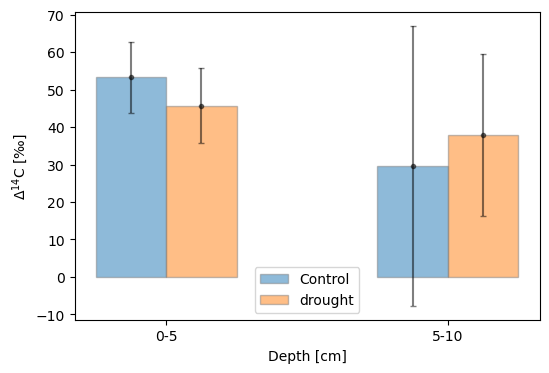

In [303]:
vv=con.columns[4]
fig=plt.subplots(figsize=(6,4)) 
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,8))
barWidth=0.25 
br1=np.arange(2) 
br2=[x+barWidth for x in br1]

res=np.empty(len(depths));std=np.empty(len(depths))
for i in range(len(depths)):res[i]=con[vv][con.depth==depths[i]].mean(); std[i]=con[vv][con.depth==depths[i]].std()
plt.bar(br1,res,width=barWidth,edgecolor='grey',label ='Control',alpha=0.5) 
plt.errorbar(br1,res,std,fmt='.',color='Black',alpha=0.5,capsize=2)

res=np.empty(len(depths));std=np.empty(len(depths))
for i in range(len(depths)):res[i]=dro[vv][dro.depth==depths[i]].mean(); std[i]=dro[vv][dro.depth==depths[i]].std()
plt.bar(br2,res,width=barWidth,edgecolor='grey',label='drought',alpha=0.5) 
plt.errorbar(br2,res,std,fmt='.',color='Black',alpha=0.5,capsize=2)
plt.legend()
plt.ylabel(u'$\Delta^{14}$C [‰]');plt.xlabel('Depth [cm]')
#plt.ylabel('F$^{14}$C [-]');plt.xlabel('Depth [cm]')
plt.xticks([r+barWidth/2 for r in range(len(depths))],depths)

### Comparison $\Delta^{14}$C incubations and field respiration

Text(0.5, 1.0, 'Drought')

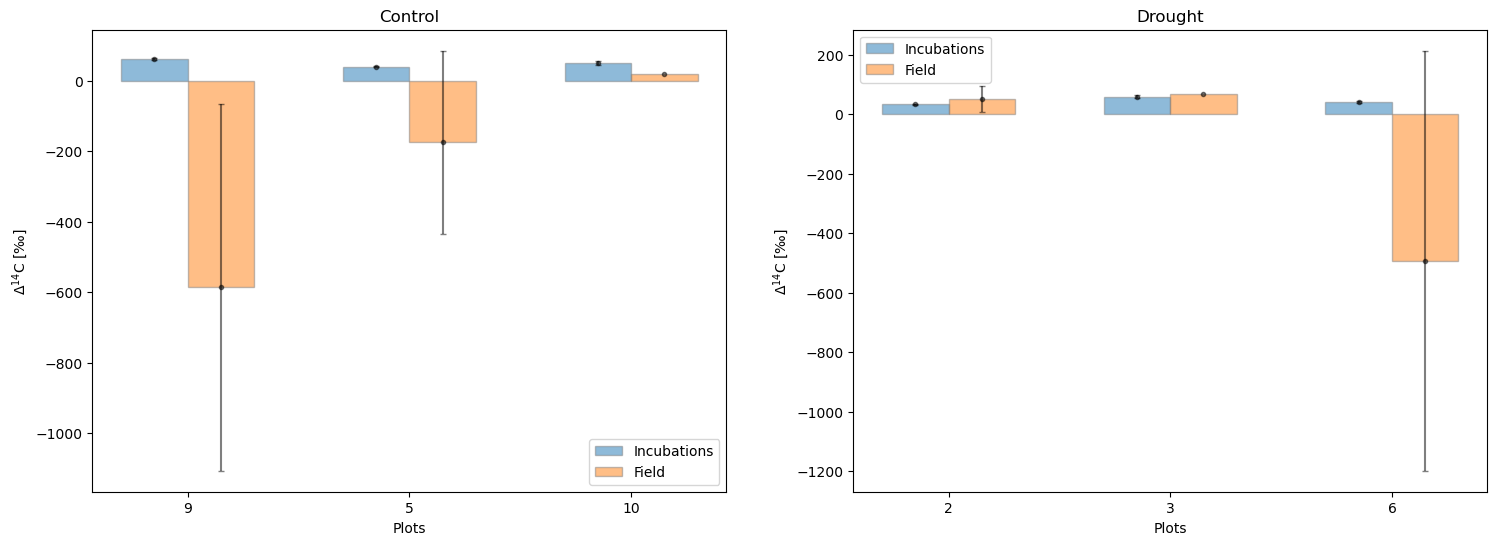

In [546]:
comp=['Incubations','Field']
control2=conf['plot'].unique();drought2=drof['plot'].unique()
res1=np.empty([3,2]);std1=np.empty([3,2]) # control
res2=np.empty([3,2]);std2=np.empty([3,2]) # drought
for i in range(3):
    w=con[con['plot']==control2[i]];res1[i,0]=w[w.columns[4]].mean();std1[i,0]=w[w.columns[4]].std()
    w=conf[conf['plot']==control2[i]];res1[i,1]=w[w.columns[4]].mean();std1[i,1]=w[w.columns[4]].std()
    
    w=dro[dro['plot']==drought2[i]];res2[i,0]=w[w.columns[4]].mean();std2[i,0]=w[w.columns[4]].std()
    w=drof[drof['plot']==drought2[i]];res2[i,1]=w[w.columns[4]].mean();std2[i,1]=w[w.columns[4]].std()
    
fig,axs=plt.subplots(1,2,figsize=[18,6])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,8))
treat=['Control','Drought']

barWidth=0.3
br1=np.arange(3)
br2=[x+barWidth for x in br1] 
br=[br1,br2]

for i in range(2):
    axs[0].bar(br[i],res1[:,i],width=barWidth,edgecolor='grey',label=comp[i],color=colors[i],alpha=0.5) 
    axs[0].errorbar(br[i],res1[:,i],std1[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)
    axs[1].bar(br[i],res2[:,i],width=barWidth,edgecolor='grey',label=comp[i],color=colors[i],alpha=0.5) 
    axs[1].errorbar(br[i],res2[:,i],std2[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)

axs[0].legend();axs[1].legend()
axs[0].set_xticks([r+barWidth/2 for r in range(len(control2))],control2)
axs[1].set_xticks([r+barWidth/2 for r in range(len(drought2))],drought2)
axs[0].set_ylabel(u'$\Delta^{14}$C [‰]');axs[1].set_ylabel(u'$\Delta^{14}$C [‰]')
axs[0].set_xlabel('Plots'); axs[1].set_xlabel('Plots')
axs[0].set_title('Control');axs[1].set_title('Drought')


### Solids -- Soils

In [48]:
data=pd.read_excel('Data/LabResults/Soil_solids.xlsx',header=30)

temp=re.compile("([a-zA-Z]+)([0-9]+)")
plot=np.empty(len(data),dtype=int); depth=['']*len(data)
for i in range(len(data)):
    b=data['Probe'][i].split('_')[1]
    plot[i]=temp.match(b).groups()[1]
    depth[i]=(data['Probe'][i].split('_')[-1]).split(' ')[-1]
    
data['plot']=plot; data['depth']=depth
depths=data.depth.unique()

con=data[data['plot'].isin(control)] 
dro=data[data['plot'].isin(drought)] 

(0.0, 1.1)

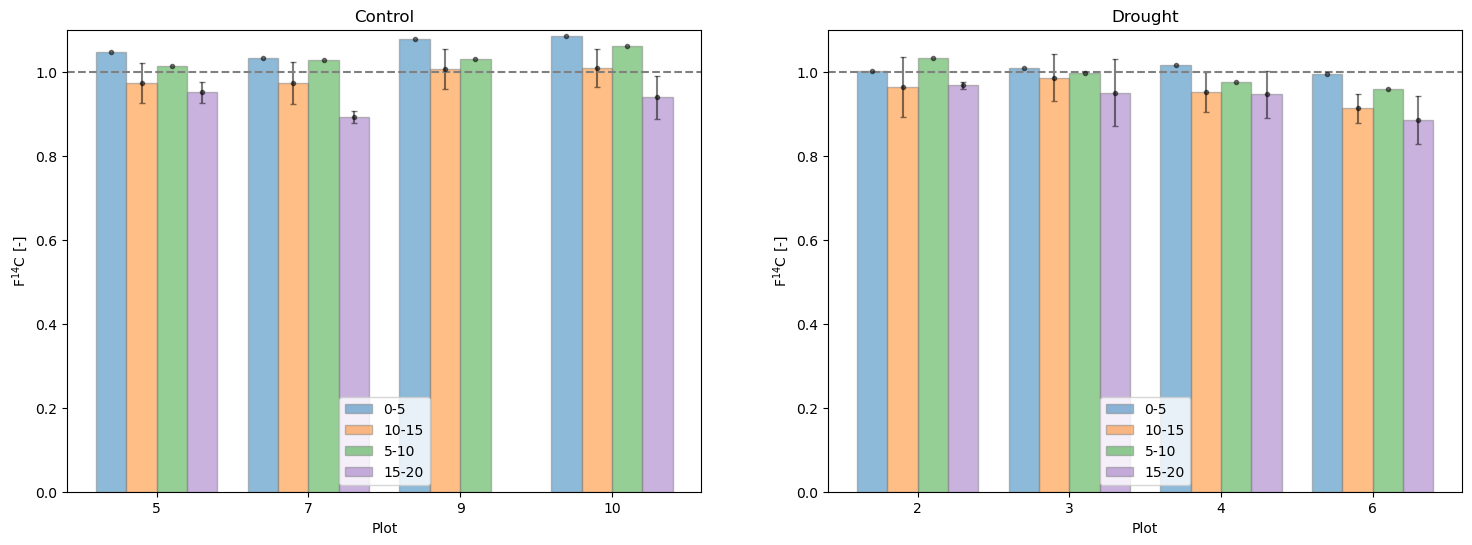

In [93]:
fig,axs=plt.subplots(1,2,figsize=[18,6])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,8))
vv=data.columns[2]

barWidth=0.20
br1=np.arange(len(depths))
br2=[x+barWidth for x in br1] 
br3=[x+barWidth for x in br2]
br4=[x+barWidth for x in br3]
br=[br1,br2,br3,br4]


res1=np.zeros([4,len(depths)])*np.nan; std1=np.zeros([4,len(depths)])*np.nan
res2=np.zeros([4,len(depths)])*np.nan; std2=np.zeros([4,len(depths)])*np.nan
for i in range(4):
    for j in range(len(depths)):
        w=con[(con['plot']==control[i])&(con['depth']==depths[j])]
        res1[i,j]=w[vv].mean();std1[i,j]=w[vv].std()
        w=dro[(dro['plot']==drought[i])&(dro['depth']==depths[j])]
        res2[i,j]=w[vv].mean();std2[i,j]=w[vv].std()

for i in range(len(depths)):
    axs[0].bar(br[i],res1[:,i],width=barWidth,edgecolor='grey',label=depths[i],color=colors[i],alpha=0.5) 
    axs[0].errorbar(br[i],res1[:,i],std1[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)
    axs[1].bar(br[i],res2[:,i],width=barWidth,edgecolor='grey',label=depths[i],color=colors[i],alpha=0.5) 
    axs[1].errorbar(br[i],res2[:,i],std2[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)
axs[0].legend();axs[1].legend()
axs[0].set_xticks([r+barWidth*1.5 for r in range(len(control))],control)
axs[1].set_xticks([r+barWidth*1.5 for r in range(len(drought))],drought)
axs[0].set_ylabel('F$^{14}$C [-]');axs[1].set_ylabel('F$^{14}$C [-]')
axs[0].set_xlabel('Plot'); axs[1].set_xlabel('Plot')
axs[0].set_title('Control'); axs[1].set_title('Drought')
axs[0].axhline(1,color='gray',linestyle='--'); axs[1].axhline(1,color='gray',linestyle='--') 
axs[0].set_ylim(0,1.1); axs[1].set_ylim(0,1.1)


Text(0.5, 0, 'Depth [cm]')

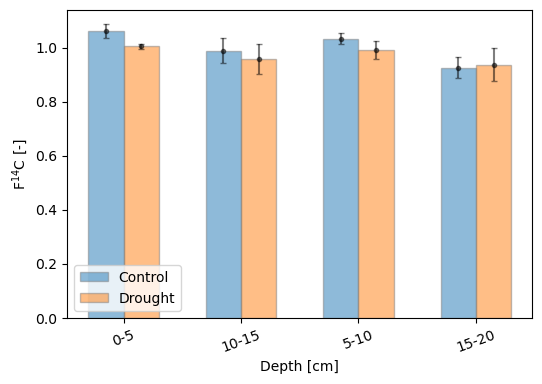

In [101]:
fig,axs=plt.subplots(figsize=[6,4])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,8))
treat=['Control','Drought']

barWidth=0.3
br=np.arange(4)
br2=[x+barWidth for x in br1] 
br=[br1,br2]

res=np.zeros([2,len(depths)])*np.nan; std=np.zeros([2,len(depths)])*np.nan
for j in range(len(depths)):
    w=con[con['depth']==depths[j]]
    res[0,j]=w[vv].mean();std[0,j]=w[vv].std()
    w=dro[dro['depth']==depths[j]]
    res[1,j]=w[vv].mean();std[1,j]=w[vv].std()
for i in range(2):
    plt.bar(br[i],res[i,:],width=barWidth,edgecolor='grey',label=treat[i],color=colors[i],alpha=0.5) 
    plt.errorbar(br[i],res[i,:],std[i,:],fmt='.',color='Black',alpha=0.5,capsize=2)
plt.legend()
plt.xticks([r+barWidth/2 for r in range(len(depths))],depths,rotation=20)
plt.ylabel('F$^{14}$C [-]');plt.xlabel('Depth [cm]')

### $\delta$13C -- roots and litter

Text(0.5, 1.0, 'Course litter, drought plots')

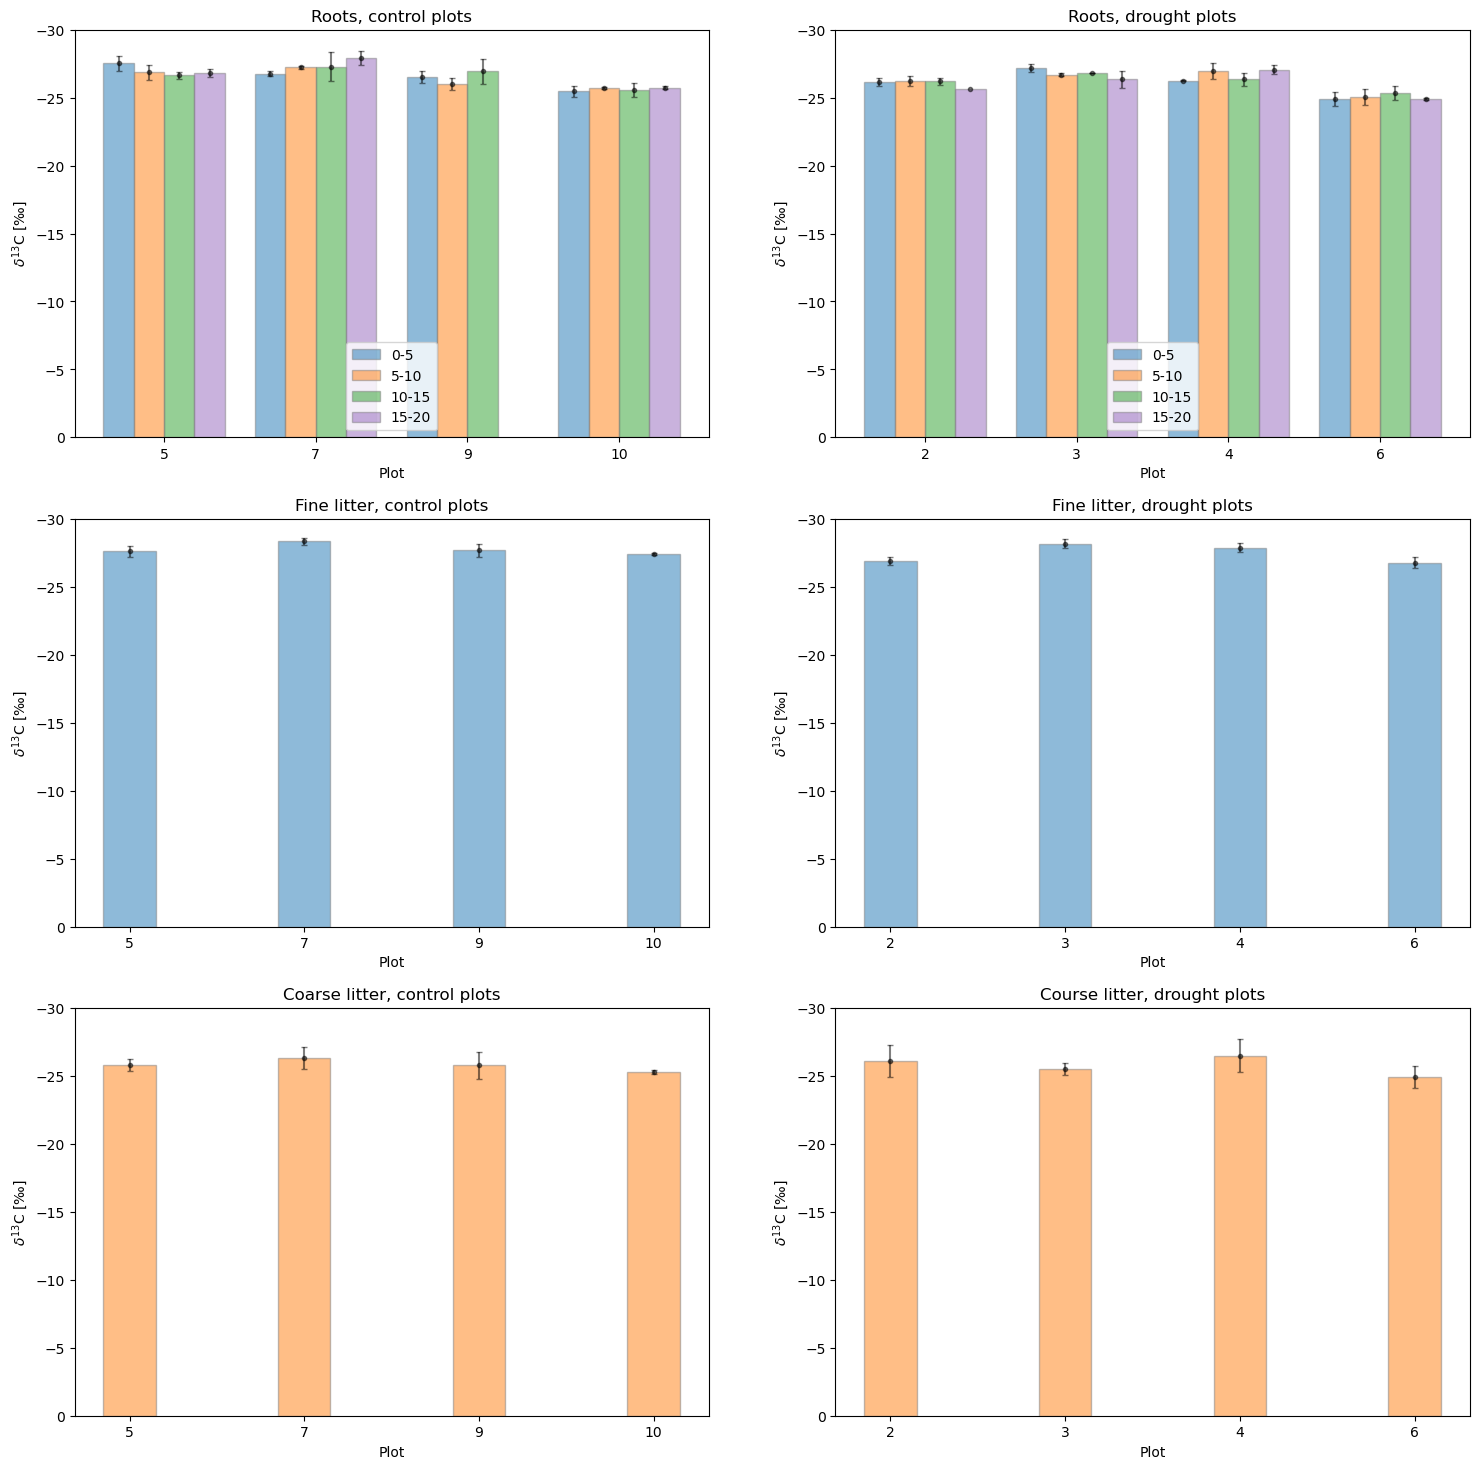

In [294]:
fig,axs=plt.subplots(3,2,figsize=[18,18])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,8))
barWidth=0.20
vv=roots.columns[17] # d13C.

## Roots
depths=roots.depth.unique()
df=roots
con=df[df['plot'].isin(control)] 
dro=df[df['plot'].isin(drought)] 

res1=np.zeros([4,len(depths)])*np.nan; std1=np.zeros([4,len(depths)])*np.nan
res2=np.zeros([4,len(depths)])*np.nan; std2=np.zeros([4,len(depths)])*np.nan
for i in range(4):
    for j in range(len(depths)):
        w=con[(con['plot']==control[i])&(con['depth']==depths[j])]
        res1[i,j]=w[vv].mean();std1[i,j]=w[vv].std()
        w=dro[(dro['plot']==drought[i])&(dro['depth']==depths[j])]
        res2[i,j]=w[vv].mean();std2[i,j]=w[vv].std()

br1=np.arange(len(depths))
br2=[x+barWidth for x in br1] 
br3=[x+barWidth for x in br2]
br4=[x+barWidth for x in br3]
br=[br1,br2,br3,br4]

for i in range(len(depths)):
    axs[0,0].bar(br[i],res1[:,i],width=barWidth,edgecolor='grey',label=depths[i],color=colors[i],alpha=0.5) 
    axs[0,0].errorbar(br[i],res1[:,i],std1[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)
    axs[0,1].bar(br[i],res2[:,i],width=barWidth,edgecolor='grey',label=depths[i],color=colors[i],alpha=0.5) 
    axs[0,1].errorbar(br[i],res2[:,i],std2[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)
axs[0,0].legend();axs[0,1].legend()
axs[0,0].set_xticks([r+barWidth*1.5 for r in range(len(control))],control)
axs[0,1].set_xticks([r+barWidth*1.5 for r in range(len(drought))],drought)
axs[0,0].set_ylabel(u'$\delta^{13}$C [‰]');axs[0,1].set_ylabel(u'$\delta^{13}$C [‰]')
axs[0,0].set_xlabel('Plot'); axs[0,1].set_xlabel('Plot')
axs[0,0].set_title('Roots, control plots'); axs[0,1].set_title('Roots, drought plots')
axs[0,0].set_ylim(0,-30); axs[0,1].set_ylim(0,-30)

# Fine litter
df=litterF
con=df[df['plot'].isin(control)] 
dro=df[df['plot'].isin(drought)] 

res=np.zeros([2,4])*np.nan; std=np.zeros([2,4])*np.nan
#res2=np.zeros(4)*np.nan; std2=np.zeros(4)*np.nan
for i in range(4):
    w=con[con['plot']==control[i]]
    res[0,i]=w[vv].mean();std[0,i]=w[vv].std()
    w=dro[dro['plot']==drought[i]]
    res[1,i]=w[vv].mean();std[1,i]=w[vv].std()
for i in range(2):
    axs[1,i].bar(br[0],res[i,:],width=barWidth+.1,edgecolor='grey',color=colors[0],alpha=0.5) 
    axs[1,i].errorbar(br[0],res[i,:],std[i,:],fmt='.',color='Black',alpha=0.5,capsize=2)
    axs[1,i].set_ylabel(u'$\delta^{13}$C [‰]'); axs[1,i].set_xlabel('Plot'); axs[1,i].set_ylim(0,-30)
axs[1,0].set_xticks([r for r in range(len(control))],control)
axs[1,1].set_xticks([r for r in range(len(drought))],drought)
axs[1,0].set_title('Fine litter, control plots'); axs[1,1].set_title('Fine litter, drought plots')

# Course litter
df=litterC
con=df[df['plot'].isin(control)] 
dro=df[df['plot'].isin(drought)] 

res=np.zeros([2,4])*np.nan; std=np.zeros([2,4])*np.nan
for i in range(4):
    w=con[con['plot']==control[i]]
    res[0,i]=w[vv].mean();std[0,i]=w[vv].std()
    w=dro[dro['plot']==drought[i]]
    res[1,i]=w[vv].mean();std[1,i]=w[vv].std()
for i in range(2):
    axs[2,i].bar(br[0],res[i,:],width=barWidth+.1,edgecolor='grey',color=colors[1],alpha=0.5) 
    axs[2,i].errorbar(br[0],res[i,:],std[i,:],fmt='.',color='Black',alpha=0.5,capsize=2)
    axs[2,i].set_ylabel(u'$\delta^{13}$C [‰]'); axs[2,i].set_xlabel('Plot'); axs[2,i].set_ylim(0,-30)
axs[2,0].set_xticks([r for r in range(len(control))],control)
axs[2,1].set_xticks([r for r in range(len(drought))],drought)
axs[2,0].set_title('Coarse litter, control plots'); axs[2,1].set_title('Course litter, drought plots')

(0.0, -30.0)

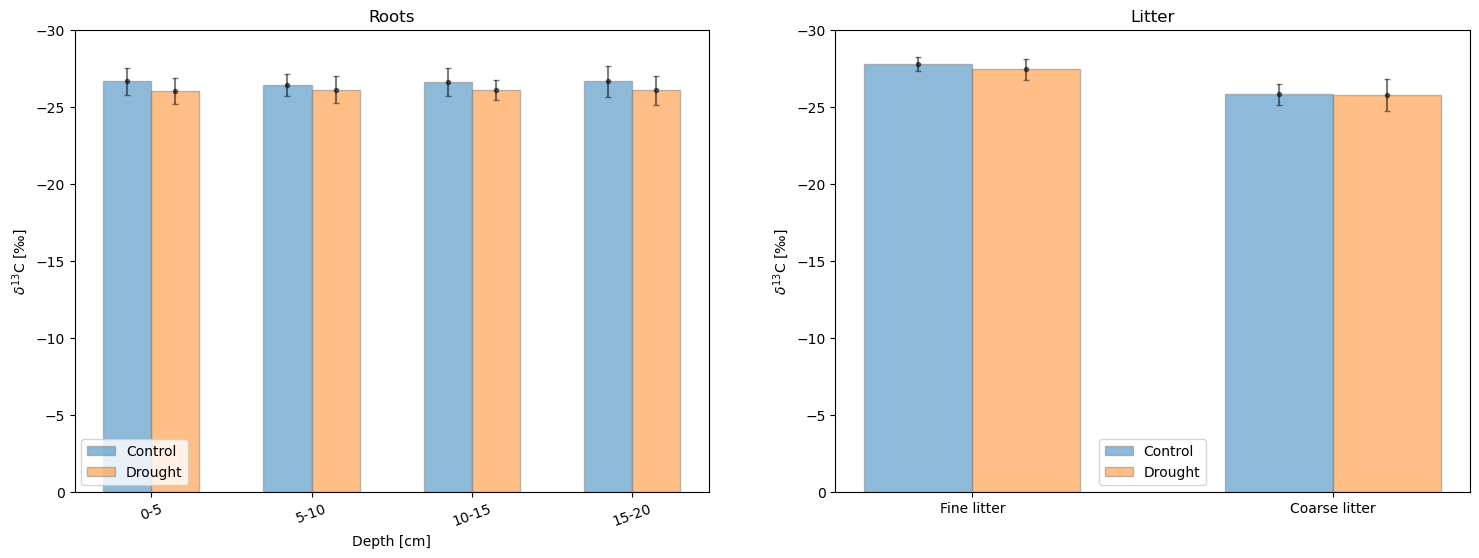

In [304]:
fig,axs=plt.subplots(1,2,figsize=[18,6])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,8))
barWidth=0.20
vv=roots.columns[17] # d13C.

# Roots
depths=roots.depth.unique()
df=roots
con=df[df['plot'].isin(control)] 
dro=df[df['plot'].isin(drought)]

res=np.zeros([2,len(depths)])*np.nan; std=np.zeros([2,len(depths)])*np.nan
for j in range(len(depths)):
    w=con[con['depth']==depths[j]]
    res[0,j]=w[vv].mean();std[0,j]=w[vv].std()
    w=dro[dro['depth']==depths[j]]
    res[1,j]=w[vv].mean();std[1,j]=w[vv].std()

treat=['Control','Drought']
barWidth=0.3
br1=np.arange(4)
br2=[x+barWidth for x in br1] 
br=[br1,br2]

for i in range(2):
    axs[0].bar(br[i],res[i,:],width=barWidth,edgecolor='grey',label=treat[i],color=colors[i],alpha=0.5) 
    axs[0].errorbar(br[i],res[i,:],std[i,:],fmt='.',color='Black',alpha=0.5,capsize=2)
axs[0].legend()
axs[0].set_xticks([r+barWidth/2 for r in range(len(depths))],depths,rotation=20)
axs[0].set_ylabel(u'$\delta^{13}$C [‰]');axs[0].set_xlabel('Depth [cm]')
axs[0].set_title('Roots')
axs[0].set_ylim(0,-30)


## Litter
res=np.zeros([2,2])*np.nan; std=np.zeros([2,4])*np.nan
df=litterF
con=df[df['plot'].isin(control)]; dro=df[df['plot'].isin(drought)] 
res[0,0]=con[vv].mean();std[0,0]=con[vv].std()
res[0,1]=dro[vv].mean();std[0,1]=dro[vv].std()
df=litterC
con=df[df['plot'].isin(control)]; dro=df[df['plot'].isin(drought)] 
res[1,0]=con[vv].mean();std[1,0]=con[vv].std()
res[1,1]=dro[vv].mean();std[1,1]=dro[vv].std()

barWidth=0.3
br1=np.arange(2)
br2=[x+barWidth for x in br1] 
br=[br1,br2]

for i in range(2):
    axs[1].bar(br[i],res[:,i],width=barWidth,edgecolor='grey',label=treat[i],color=colors[i],alpha=0.5) 
    axs[1].errorbar(br[i],res[:,i],std[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)
axs[1].legend()
axs[1].set_xticks([r+barWidth/2 for r in range(2)],['Fine litter','Coarse litter'])
axs[1].set_ylabel(u'$\delta^{13}$C [‰]')
axs[1].set_title('Litter')
axs[1].set_ylim(0,-30)

### CO$_2$ Concentrations